In [0]:
!pip3 install tensorflow-gpu==2.0.0-beta0

     |████████████████████████████████| 348.9MB 42kB/s 
     |████████████████████████████████| 501kB 53.2MB/s 
     |████████████████████████████████| 3.1MB 43.4MB/s 


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import tensorflow as tf
import os
import glob
import numpy as np
import numpy.random as npr
import pandas as pd
import tensorflow.keras as k
import tensorflow.keras.layers as l
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras import Model
import matplotlib.pyplot as plt
import random
from keras import optimizers
import pandas as pd

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [0]:
# reading above csv files as numpy arrays and check dimmensions

my_train_d = pd.read_csv('/content/drive/My Drive/Masterlab/csv files/train_x.csv',skiprows=1,usecols=range(1,7),sep=',',header=None)
my_train_l = pd.read_csv('/content/drive/My Drive/Masterlab/csv files/train_y.csv',skiprows=1,usecols=range(1,13),sep=',',header=None)
my_val_d = pd.read_csv('/content/drive/My Drive/Masterlab/csv files/val_x.csv',skiprows=1,usecols=range(1,7),sep=',',header=None)
my_val_l = pd.read_csv('/content/drive/My Drive/Masterlab/csv files/val_y.csv',skiprows=1,usecols=range(1,13),sep=',',header=None)
my_test_d = pd.read_csv('/content/drive/My Drive/Masterlab/csv files/test_x.csv',skiprows=1,usecols=range(1,7),sep=',',header=None)
my_test_l = pd.read_csv('/content/drive/My Drive/Masterlab/csv files/test_y.csv',skiprows=1,usecols=range(1,13),sep=',',header=None)


print(np.array(my_train_d).shape) 
print(np.array(my_train_l).shape)  # (469194, 12)
print(np.array(my_val_d).shape) 
print(np.array(my_val_l).shape)    # (133831, 12)
print(np.array(my_test_d).shape)   # (69910, 6)
print(np.array(my_test_l).shape)   # (69910, 12)

(553441, 6)
(553441, 12)
(85900, 6)
(85900, 12)
(175059, 6)
(175059, 12)


In [0]:
from collections import Counter

f= lambda x: x+1
y = f(np.argmax(train_y, axis=1))
counter = Counter(y)
print(counter)

Counter({5: 92912, 6: 90807, 1: 85010, 4: 83714, 2: 80098, 3: 73392, 11: 10831, 9: 8560, 10: 7922, 12: 7521, 7: 7149, 8: 5525})


In [0]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)


x_resampled, y_resampled = ros.fit_sample(np.array(train_x), np.array(train_y))
c = np.argmax(y_resampled, axis=1)
c = Counter(c)
print(c)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Counter({4: 92912, 6: 92912, 3: 92912, 7: 92912, 10: 92912, 5: 92912, 9: 92912, 8: 92912, 11: 92912, 0: 92912, 2: 92912, 1: 92912})


In [0]:
# use smote to oversample

from imblearn.over_sampling import SMOTE

# smote = SMOTE(ratio='minority')
#smote = SMOTE(random_state=0)
smote = SMOTE()
x_sm, y_sm = smote.fit_sample(np.array(train_x), np.array(train_y))


c = f(np.argmax(y_sm, axis=1))
c = Counter(c)
print(c)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

Counter({5: 92912, 7: 92912, 4: 92912, 8: 92912, 11: 92912, 6: 92912, 10: 92912, 9: 92912, 12: 92912, 1: 92912, 3: 92912, 2: 92912})


In [0]:
window_size = 250
window_shift = 125
batch_size = 32
epoch = 15

train_x = tf.convert_to_tensor(my_train_d.values)
train_y = tf.convert_to_tensor(my_train_l.values, dtype=tf.int16)
val_x = tf.convert_to_tensor(my_val_d.values)
val_y = tf.convert_to_tensor(my_val_l.values, dtype=tf.int16)
test_x = tf.convert_to_tensor(my_test_d.values)
test_y = tf.convert_to_tensor(my_test_l.values, dtype=tf.int16)


def sliding_win(x, y, window_size, window_shift, batch_size):

    ds_x = tf.data.Dataset.from_tensor_slices(x)
    ds_y = tf.data.Dataset.from_tensor_slices(y)
    # ds_y = ds_y.map(tf.one_hot())
    ds_x = ds_x.window(size=window_size, shift=window_shift, drop_remainder=True).flat_map(
        lambda x: x.batch(window_size)).batch(batch_size, drop_remainder=True)
    ds_y = ds_y.window(size=window_size, shift=window_shift, drop_remainder=True).flat_map(
        lambda y: y.batch(window_size)).batch(batch_size, drop_remainder=True)
    ds = tf.data.Dataset.zip((ds_x, ds_y))
    return ds
   

In [0]:

train_sw = sliding_win(train_x, train_y, window_size, window_shift, batch_size)
train_resampled_sw = sliding_win(x_sm, y_sm, window_size, window_shift, batch_size)
test_sw = sliding_win(test_x,test_y, window_size, window_shift, batch_size)
val_sw = sliding_win(val_x,val_y, window_size, window_shift, batch_size) 


'def parse_func(sw):\n  for x,y in train_sw.unbatch():\n   \n    # print(tf.shape(y))    # y (250,12)\n\n    s = np.argmax(y, axis=1) \n    # print(tf.shape(s))    # s (250,)\n    s_label = []\n    for i in range(0,250):\n      if s[i] == s[0]:\n        s_label = s[0]\n      else:\n        s_label = []\n    print(s_label)\n\n\n  ds_x = tf.data.Dataset.from_tensor_slices(x)\n  ds_y = tf.data.Dataset.from_tensor_slices(y)\n  # ds_y = ds_y.map(tf.one_hot())\n  ds_x = ds_x.window(size=window_size, shift=window_shift, drop_remainder=True).flat_map(\n        lambda x: x.batch(window_size)).batch(batch_size, drop_remainder=True)\n  ds_y = ds_y.window(size=window_size, shift=window_shift, drop_remainder=True).flat_map(\n        lambda y: y.batch(window_size)).batch(batch_size, drop_remainder=True)\n  ds = tf.data.Dataset.zip((ds_x, ds_y))\n  \n  return x_\n  \nfor x,y train_sw.unbatch():\n'

In [0]:
# build model 
# windows 500,250 optional

def base_model():
    inputs = tf.keras.layers.Input(shape=(window_size, 6))

    output = tf.keras.layers.LSTM(units=128, return_sequences=True)(inputs)

    output = tf.keras.layers.Dense(units=64, activation='relu')(output)

    output = tf.keras.layers.Dropout(rate=0.25)(output)

    output = tf.keras.layers.Dense(units=12, activation='softmax')(output)
    model = tf.keras.models.Model(inputs=inputs, outputs=output)
    return model


"""def base_model():
    inputs = tf.keras.layers.Input(shape=(window_size, 6))

    output = tf.keras.layers.LSTM(units=128, return_state=True)(inputs)
    
    return model"""
    
model = base_model()
# model.load_weights("checkpoint_90_test/cp.ckpt")
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

checkpoint_path = "test_ckpt/cp.ckpt"

# checkpoint_dir = os.path.dirname(checkpoint_path)
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)
model.fit(train_resampled_sw, epochs=epoch, validation_data=val_sw, callbacks=[cp_callback])
model.save('my_model.h5')
model.save_weights('my_model_weights.h5')


# model.save('my_model.h5',save_format="tf")


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 250, 6)]          0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 250, 128)          69120     
_________________________________________________________________
dense_5 (Dense)              (None, 250, 64)           8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 250, 64)           0         
_________________________________________________________________
dense_6 (Dense)              (None, 250, 12)           780       
Total params: 78,156
Trainable params: 78,156
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
    278/Unknown - 118s 425ms/step - loss: 1.9400 - accuracy: 0.4852
Epoch 00001: saving model to test_ckpt/cp.

In [0]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
f = lambda x : x + 1

# test accuracy
def check_testing():
  l_arr = []
  p_arr = []
    
  for d,l in test_sw:  
                                          # after unbatch   d(500,6)   l(500,12)
    if len(l_arr) == 0 and len(p_arr)==0:
      pred = model.predict(d)
      p = pred.reshape(-1,12)      # reduce dimension
      l = tf.reshape(l,(-1,12))    
      p_reformed = f(np.argmax(p, axis=1))       #(40000,)
      l_reformed = f(np.argmax(l, axis=1))       #(40000,)
      l_arr = l_reformed
      p_arr = p_reformed
    else:
      pred = model.predict(d)
      p = pred.reshape(-1,12)      # reduce dimension
      l = tf.reshape(l,(-1,12))
      p_reformed = f(np.argmax(p, axis=1))      
      l_reformed = f(np.argmax(l, axis=1))

      l_arr = np.hstack((l_arr, l_reformed))
      p_arr = np.hstack((p_arr, p_reformed))      #last (200000,)

  acc_score = accuracy_score(l_arr, p_arr)
  recall = recall_score(l_arr, p_arr, average="macro")
  precision = precision_score(l_arr, p_arr, average="macro")
  f1 = f1_score(l_arr, p_arr, average="macro")

  return [acc_score, recall, precision, f1]

print(check_testing())


def get_l_p():

  l_arr = []
  p_arr = []
    
  for d,l in test_sw:  
                                          # after unbatch   d(500,6)   l(500,12)
    if len(l_arr) == 0 and len(p_arr)==0:
      pred = model.predict(d)
      p = pred.reshape(-1,12)      # reduce dimension
      l = tf.reshape(l,(-1,12))    
      p_reformed = f(np.argmax(p, axis=1))       #(40000,)
      l_reformed = f(np.argmax(l, axis=1))       #(40000,)
      l_arr = l_reformed
      p_arr = p_reformed
    else:
      pred = model.predict(d)
      p = pred.reshape(-1,12)      # reduce dimension
      l = tf.reshape(l,(-1,12))
      p_reformed = f(np.argmax(p, axis=1))      
      l_reformed = f(np.argmax(l, axis=1))

      l_arr = np.hstack((l_arr, l_reformed))
      p_arr = np.hstack((p_arr, p_reformed))      #last (200000,)


  return l_arr, p_arr


[0.8856511627906977, 0.6733651324955146, 0.6815478774826557, 0.6597474256522258]


(344000,)
(344000,)


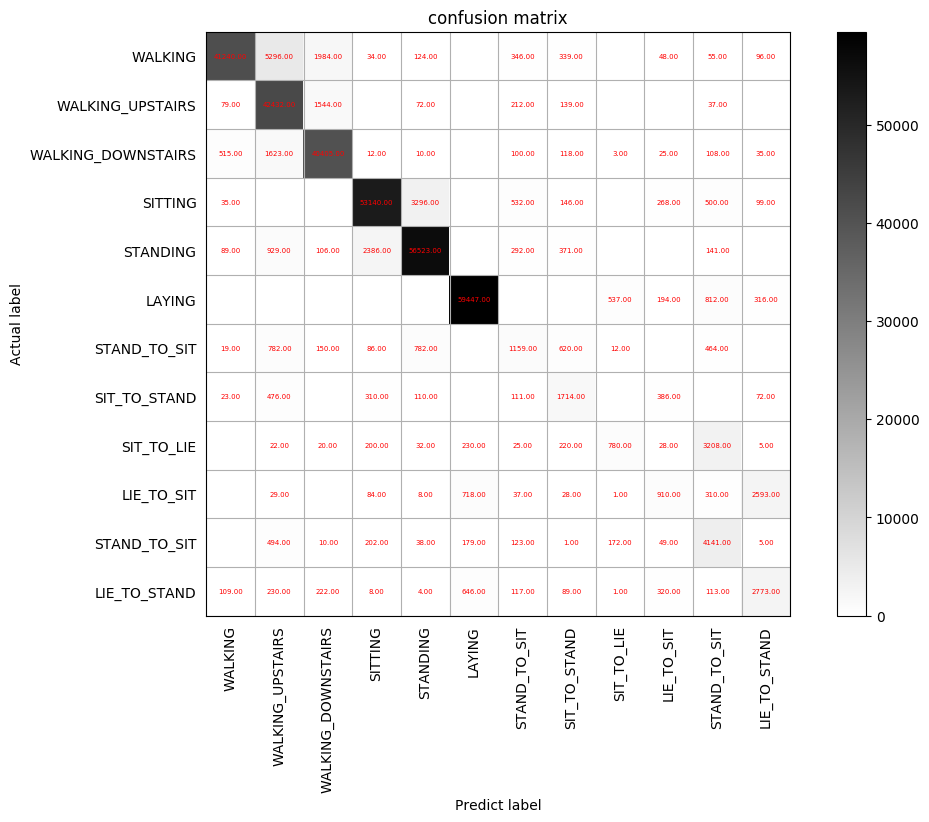

"if __name__ == '__main__':\n    print()"

In [0]:
# Metrics confusion matrix

def plot_confusion_matrix(cm, savename, title='Confusion Matrix'):
    plt.figure(figsize=(12, 8), dpi=100)
    np.set_printoptions(precision=2)

    # the probabilities in confusion matrix
    ind_array = np.arange(len(classes))
    x, y = np.meshgrid(ind_array, ind_array)
    for x_val, y_val in zip(x.flatten(), y.flatten()):
        c = cm[y_val][x_val]
        if c > 0.001:
            plt.text(x_val, y_val, "%0.2f" % (c,), color='red', fontsize=5, va='center', ha='center')

    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.title(title)
    plt.colorbar()
    xlocations = np.array(range(len(classes)))
    plt.xticks(xlocations, classes, rotation=90)
    plt.yticks(xlocations, classes)
    plt.ylabel('Actual label')
    plt.xlabel('Predict label')

    # offset the tick
    tick_marks = np.array(range(len(classes))) + 0.5
    plt.gca().set_xticks(tick_marks, minor=True)
    plt.gca().set_yticks(tick_marks, minor=True)
    plt.gca().xaxis.set_ticks_position('none')
    plt.gca().yaxis.set_ticks_position('none')
    plt.grid(True, which='minor', linestyle='-')
    plt.gcf().subplots_adjust(bottom=0.15)

    # show confusion matrix
    plt.savefig(savename, format='png')
    plt.show()


classes = ['WALKING', 'WALKING_UPSTAIRS', 'WALKING_DOWNSTAIRS', 'SITTING', 'STANDING', 'LAYING', 'STAND_TO_SIT',
           'SIT_TO_STAND', 'SIT_TO_LIE', 'LIE_TO_SIT', 'STAND_TO_SIT', 'LIE_TO_STAND']

"""random_numbers = np.random.randint(6, size=50) [4 3 4 4 1 3 5 4 0 5 1 1 2 2 1 2 3 1 2 4 4 0 4 1 3 0 0 1 4 4 4 3 1 2 1 3 4
 4 0 2 0 5 5 4 2 0 3 2 1 2]
y_t = random_numbers.copy() 
random_numbers[:10] = np.random.randint(6, size=10)  # 将前10个样本的值进行随机更改 [0 4 5 1 0 5 0 2 0 1 1 1 2 2 1 2 3 1 2 4 4 0 4 1 3 0 0 1 4 4 4 3 1 2 1 3 4
 4 0 2 0 5 5 4 2 0 3 2 1 2]
y_p = random_numbers"""

y_true, y_pred = get_l_p()
print(np.array(y_true).shape)
print(np.array(y_pred).shape)
# 获取混淆矩阵
cm = confusion_matrix(y_true, y_pred)
plot_confusion_matrix(cm, 'confusion_matrix.png', title='confusion matrix')
"""if __name__ == '__main__':
    print()"""